Mapa Auto-Organizativo (SOM) o red de Kohonen
===

* 41:42 min | Última modificación: Mayo 27, 2021 | [YouTube]

In [1]:
import warnings

warnings.filterwarnings("ignore")

![assets/som.png](assets/som.png)

## Código SOM

In [2]:
%%writefile som.py
import numpy as np
import matplotlib.pyplot as plt

class SOM:
    def __init__(
        self,
        nrows,
        ncols,
        ndim,
        init_learning_rate=0.5,
        max_iter=10,
        seed=None,
    ):
        #
        # Configuración del modelo
        #
        self.nrows = nrows
        self.ncols = ncols
        self.ndim = ndim
        self.init_learning_rate = init_learning_rate
        self.max_iter = max_iter

        #
        # Parámetros internos
        #
        if seed is None:
            self.rng = np.random.default_rng()
        else:
            self.rng = np.random.default_rng(seed)
            
        self.map = self.rng.uniform(size=(self.nrows, self.ncols, self.ndim))

    def closest_node(self, x):
        #
        # Dado un vector de entrada x, computa el nodo más
        # cercano del SOM y retorna sus coordenadas
        #
        dist = np.zeros(shape=(self.nrows, self.ncols))
        for i in range(self.nrows):
            for j in range(self.ncols):
                dist[i, j] = np.sqrt(np.sum((self.map[i, j] - x) ** 2))
        return np.unravel_index(dist.argmin(), dist.shape)

    def fit(self, X):

        # distancia inicial maxima
        range_max = self.nrows + self.ncols

        for iter in range(self.max_iter):

            #
            # Constantes para la iteración actual.
            #
            percentage = 1.0 - float(iter) / self.max_iter
            neighbourhood = int(percentage * range_max)
            current_rate = percentage * self.init_learning_rate

            # for t in rng.choice(len(X), len(X), replace=False):
            t = self.rng.integers(low=0, high=len(X))
            
            bmu_row, bmu_col = self.closest_node(X[t, :])

            for i in range(self.nrows):
                for j in range(self.ncols):
                    if abs(bmu_row - i) + abs(bmu_col - j) < neighbourhood:
                        self.map[i, j] += current_rate * (
                            X[t] - self.map[i, j]
                        )

    def plot_Umatrix(self):

        u_matrix = np.zeros((self.nrows, self.ncols), np.float64)

        for i in range(self.nrows):
            for j in range(self.ncols):

                v = self.map[i, j]
                sum_dists = 0.0
                ct = 0.0

                if i - 1 >= 0:
                    sum_dists += np.sqrt(np.sum((self.map[i - 1, j] - v) ** 2))
                    ct += 1

                if i + 1 <= self.nrows - 1:
                    sum_dists += np.sqrt(np.sum((self.map[i + 1, j] - v) ** 2))
                    ct += 1
                if j - 1 >= 0:
                    sum_dists += np.sqrt(np.sum((self.map[i, j - 1] - v) ** 2))
                    ct += 1
                if j + 1 <= self.ncols - 1:
                    sum_dists += np.sqrt(np.sum((self.map[i, j + 1] - v) ** 2))
                    ct += 1

                u_matrix[i, j] = sum_dists / ct

        plt.imshow(u_matrix, cmap="gray")

    def dimensionality_reduction(self, X, y):

        # self.fit(X)
        
        mapping = np.empty(shape=(self.nrows, self.ncols), dtype=object)
        
        for i in range(self.nrows):
            for j in range(self.ncols):
                mapping[i, j] = []

        for t, label in enumerate(y):
            m, n = self.closest_node(X[t, :])
            mapping[m, n].append(label)

        label_map = np.zeros((self.nrows, self.ncols))
        for i in range(self.nrows):
            for j in range(self.ncols):
                if mapping[i, j] == []:
                    label_map[i, j] = None
                else:
                    label_map[i, j] = max(set(mapping[i, j]), key=mapping[i, j].count)

        plt.imshow(label_map)

    def plot_grid(self):
        #
        fig = plt.figure(figsize=(3, 3))
        
        for i in range(self.nrows):
            for j in range(self.ncols):

                if i + 1 < self.nrows:

                    # linea horizontal
                    x0 = self.map[i, j][0]
                    y0 = self.map[i, j][1]
                    x1 = self.map[i + 1, j][0]
                    y1 = self.map[i + 1, j][1]
                    plt.plot([x0, x1], [y0, y1], ".-k")

                if j + 1 < self.ncols:
                    #  linea vertical
                    x0 = self.map[i, j][0]
                    y0 = self.map[i, j][1]
                    x1 = self.map[i, j + 1][0]
                    y1 = self.map[i, j + 1][1]
                    plt.plot([x0, x1], [y0, y1], ".-k")

        plt.axis("off")

Overwriting som.py


## Representación de puntos de una distribución uniforme

In [3]:
#
# Se genera una muestra de 1000 puntos que siguen una
#  distribución uniforme [0, 1] en el plano (x,y)
#
import numpy as np

NPOINTS = 1000

rng = np.random.default_rng(123456)
sample = rng.uniform(size=(NPOINTS, 2))
sample

array([[0.63651375, 0.38481166],
       [0.04744542, 0.95525274],
       [0.90605094, 0.45696955],
       ...,
       [0.6232829 , 0.425067  ],
       [0.80863706, 0.08872339],
       [0.93236476, 0.05556339]])

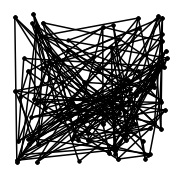

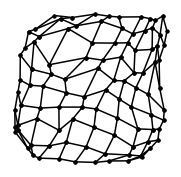

In [4]:
#
# Se crea un SOM de 10x10x2. Recuerde que los datos tienen
# dos dimensiones (x,y)
#
from som import SOM

som = SOM(nrows=10, ncols=10, ndim=2, max_iter=700)
som.plot_grid()
som.fit(sample)
som.plot_grid()